In [1]:
# Import Matplotlib, Seaborn, and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file.
movies = pd.read_csv('movies.csv')

# Read the XLSX file.
ott = pd.read_excel('ott.xlsx')


In [2]:
# View the DataFrame.
print(movies.shape)
print(movies.dtypes)
print(movies.columns)
movies.tail()

(16744, 11)
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,Richard Slater-Jones,Documentary,United States,English,NaN
16743,16744,In Beaver Valley,1950,NaN,NaN,NaN,James Algar,"Documentary,Short,Family",United States,English,32.0


In [3]:
# View the DataFrame.
print(ott.shape)
print(ott.dtypes)
print(ott.columns)
ott.tail()

(16744, 5)
ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object
Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')


,ID,Netflix,Hulu,Prime Video,Disney+
16739,16740,0,0,1,0
16740,16741,0,0,1,0
16741,16742,0,0,1,0
16742,16743,0,0,1,0
16743,16744,1,0,0,0


In [4]:
# Use the left join to merge the two DataFrames.
movies_ott = pd.merge(movies, ott, on='ID', how='left')

# View the new DataFrame.
movies_ott.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


Plot a countplot to determine what age group has streamed the most movies.

<AxesSubplot:xlabel='Age', ylabel='count'>

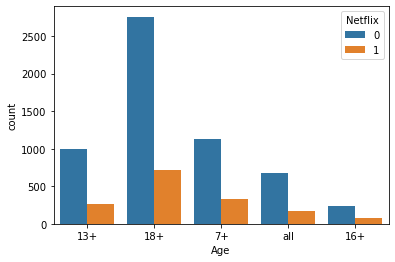

In [7]:
# Create a countplot based on number of movies streamed by Netflix per age group.
sns.countplot(x='Age', hue='Netflix', data=movies_ott)

What age group had the most-streamed movies?
Can you identify any gaps that Netflix needs to address?

18+, 16+

Plot a histogram for the IMDb rating column

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

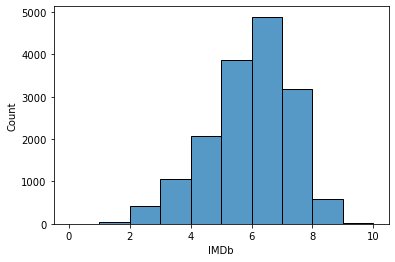

In [11]:
# Create the histogram and set binwidth=1.
sns.histplot(data=movies_ott, x='IMDb', binwidth=1)

Plot a scatterplot using the scatterplot function to display the correlation 
between the ratings from Rotten Tomatoes and IMDb.

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='IMDb'>

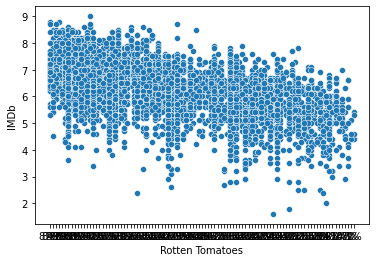

In [15]:
# Create a scatterplot with three variables.
sns.scatterplot(x='Rotten Tomatoes', y='IMDb', data=movies_ott)


Plot a boxplot to display the outliers when comparing the user age and their IMDb ratings for the movies. Based on the plot, answer the following questions: 
What can you infer from the outliers of the ratings data given by different age groups?
How can you improve the quality of the figure?

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

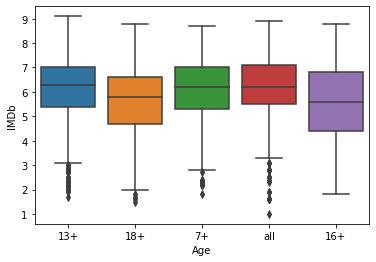

In [16]:
# Create a boxplot based on species and body_mass_g.
sns.boxplot(data=movies_ott, x='Age', y='IMDb')

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

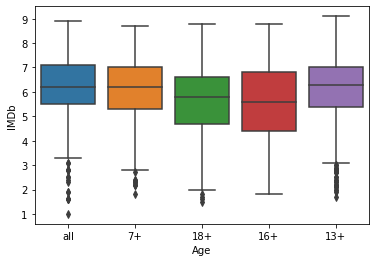

In [17]:
# Specify the order of variables. 
my_order = movies_ott.groupby(by=['Age'])['IMDb'].median().iloc[::-1].index

# Create a boxplot based on the order of variables.
sns.boxplot(x='Age', y='IMDb', data=movies_ott, order=my_order)

# 4.1.16 Lineplots

Plot a lineplot to identify possible trends by comparing the movies' release year and their IMDb ratings.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

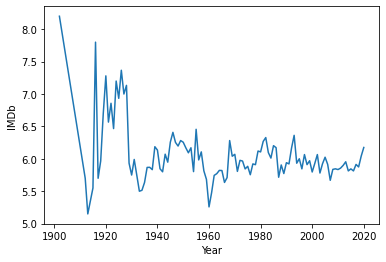

In [22]:
# Create a simple lineplot.
sns.lineplot(x='Year', y='IMDb', data=movies_ott, ci=None)

What can you infer about the users’ ratings for movies released between 1920 and 1940?
What can you infer about the users’ ratings for movies released between 1960 and 1980?

Enhance the lineplot to include a comparison between the age, rating, and year of release of the movies.

TypeError: 'value' must be an instance of str or bytes, not a float

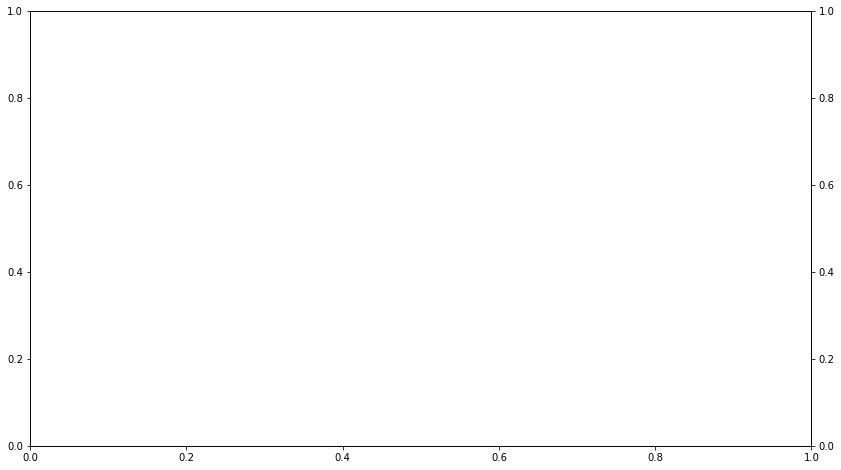

In [27]:
fig, age_ax = plt.subplots()
fig.set_size_inches(14, 8)
 
# Let's create other plot, using the same X axes.
imdb_ax = age_ax.twinx()

# Adding Age and IMDBb rating lines to the plot against Year.
age_lines = age_ax.plot(movies_ott["Year"], movies_ott["Age"])
imdb_lines = imdb_ax.plot(movies_ott["Year"], movies_ott["IMDb"])

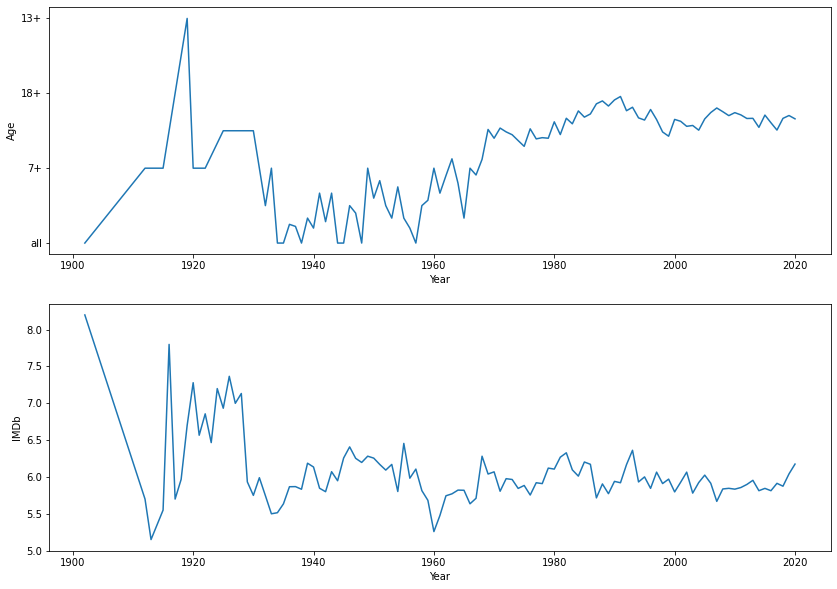

In [26]:
# Alternative methods.
fig, ax = plt.subplots(2)
fig.set_size_inches(14, 10)

# Create lineplots.
sns.lineplot(x='Year',
             y='Age',
             ax=ax[0],
             data=movies_ott, ci=None)

sns.lineplot(x='Year',
             y='IMDb',
             ax=ax[1],
             data=movies_ott, ci=None)

# View the lineplots.
plt.show()

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

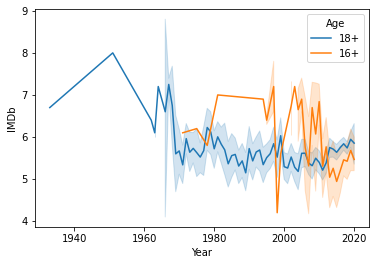

In [32]:
# Create lineplots with specification.
sns.lineplot(x = 'Year', y = 'IMDb',
             data=movies_ott[movies_ott['Age'].isin(['16+', '18+'])],
             hue ='Age')

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

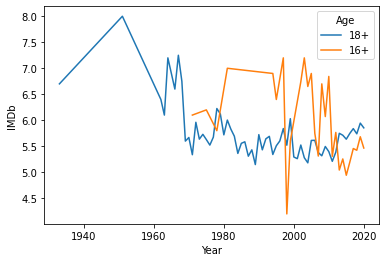

In [34]:
# Create lineplots with specification.
sns.lineplot(x = 'Year', y = 'IMDb',
             data=movies_ott[movies_ott['Age'].isin(['16+', '18+'])],
             hue ='Age', ci=None)